# Credifi Credit Risk Analysis

**Submission Format Requirements:**
- All code and results are presented in this Jupyter Notebook.
- Library imports, version listing, and reproducibility are ensured.
- Well-commented code for clarity.


In [11]:
# Library Imports and Version Listing
import platform
import pandas as pd
import numpy as np
import sklearn
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost
import pickle

# Print versions
print(f'Python version: {platform.python_version()}')
print(f'Pandas version: {pd.__version__}')
print(f'Numpy version: {np.__version__}')
print(f'scikit-learn version: {sklearn.__version__}')
print(f'XGBoost version: {xgboost.__version__}')


Python version: 3.12.7
Pandas version: 2.2.2
Numpy version: 1.26.4
scikit-learn version: 1.5.1
XGBoost version: 3.0.2


## Data Loading and Preprocessing
Load the credit data and apply necessary preprocessing steps as per the project pipeline.


In [2]:
# Data Loading, Cleaning, and Preprocessing
import sys
import os

# Add project root (where ml/ folder is) to sys.path
sys.path.append(os.path.abspath(r"C:\Users\amogh\Downloads\CrediFi\ml"))  # or the full path like "/home/user/CrediFi"

from ml.data_processor import CreditDataProcessor

# Initialize processor
processor = CreditDataProcessor()

# Load raw data
data = processor.load_data('data/credit_data.csv')
print(f'Dataset shape: {data.shape}')
display(data.head())

# Clean data
clean_data = processor.clean_data(data)
print('After cleaning:')
display(clean_data.describe())

# Encode categorical features
encoded_data = processor.encode_categorical_features(clean_data)
print('After encoding categorical features:')
display(encoded_data.head())

# Scale numerical features
scaled_data = processor.scale_features(encoded_data)
print('After scaling numerical features:')
display(scaled_data.head())

Dataset shape: (32581, 11)


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,1,0.55,Y,4


After cleaning:


C:\Users\amogh\Downloads\CrediFi\ml\data_processor.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)


,person_age,person_income,person_emp_length,loan_amnt,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32405.000000,32405.000000,32405.000000,32405.000000,32405.000000,32405.000000,32405.000000
mean,27.452939,62460.606913,4.683351,9418.729363,0.218732,0.168856,5.713455
std,5.274497,31861.484030,3.719508,5828.849798,0.413393,0.102403,3.713609
min,20.000000,4000.000000,0.000000,500.000000,0.000000,0.000000,2.000000
25%,23.000000,38500.000000,2.000000,5000.000000,0.000000,0.090000,3.000000
50%,26.000000,55000.000000,4.000000,8000.000000,0.000000,0.150000,4.000000
75%,30.000000,79380.000000,7.000000,12250.000000,0.000000,0.230000,8.000000
max,40.500000,140700.000000,14.500000,23125.000000,1.000000,0.440000,15.500000


After encoding categorical features:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22.0,59000,3,14.5,4,3,23125,1,0.44,Y,3.0
1,21.0,9600,2,5.0,1,1,1000,0,0.10,N,2.0
2,25.0,9600,0,1.0,3,2,5500,1,0.44,N,3.0
3,23.0,65500,3,4.0,3,2,23125,1,0.44,N,2.0
4,24.0,54400,3,8.0,3,2,23125,1,0.44,Y,4.0


After scaling numerical features:


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,-1.033847,-0.108616,3,2.639274,4,3,2.351490,1,0.44,Y,3.0
1,-1.223441,-1.659101,2,0.085133,1,1,-1.444343,0,0.10,N,2.0
2,-0.465064,-1.659101,0,-0.990295,3,2,-0.672309,1,0.44,N,3.0
3,-0.844253,0.095395,3,-0.183724,3,2,2.351490,1,0.44,N,2.0
4,-0.654658,-0.252993,3,0.891704,3,2,2.351490,1,0.44,Y,4.0


## Model Training and Evaluation
Train the XGBoost model, evaluate its performance, and visualize the results.

Starting model training...
Training XGBoost model...
Model training completed! Test accuracy: 0.9349
Train Score: 0.9379052176597715
Test Score: 0.9348564371719666
Accuracy: 0.9348564371719666
AUC Score: 0.9463093658913828
Cross-Validation Mean: 0.9298780719826485
Cross-Validation Std: 0.0029473484466991276


,precision,recall,f1-score,support
0,0.931054,0.989923,0.959586,5061.000000
1,0.953510,0.738179,0.832140,1417.000000
accuracy,0.934856,0.934856,0.934856,0.934856
macro avg,0.942282,0.864051,0.895863,6478.000000
weighted avg,0.935966,0.934856,0.931709,6478.000000


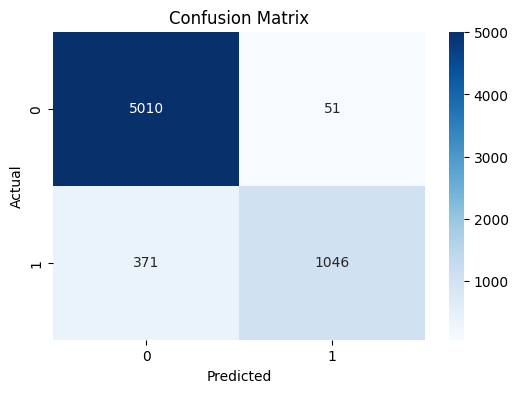

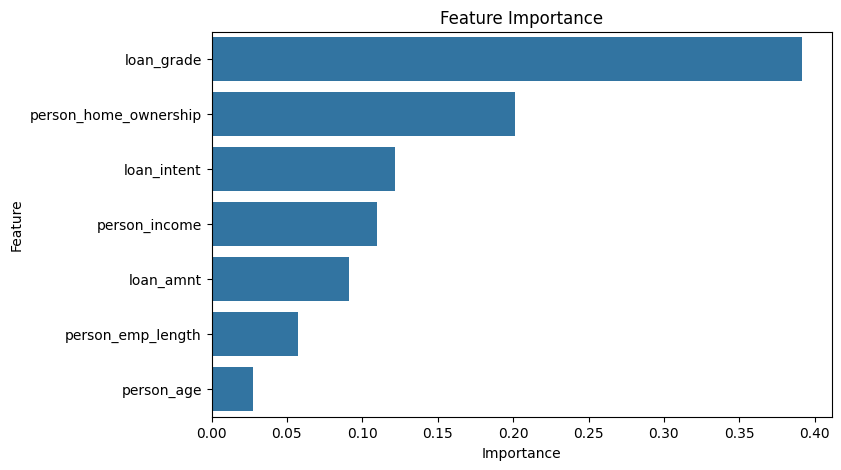

In [4]:
# Model Training and Evaluation
from ml.model import CreditRiskModel

# Initialize model
risk_model = CreditRiskModel()

# Train the model (set optimize_hyperparameters=True if you want grid search)
results = risk_model.train_model(clean_data, optimize_hyperparameters=False)

# Print evaluation metrics
print("Train Score:", results['train_score'])
print("Test Score:", results['test_score'])
print("Accuracy:", results['accuracy'])
print("AUC Score:", results['auc_score'])
print("Cross-Validation Mean:", results['cv_mean'])
print("Cross-Validation Std:", results['cv_std'])

# Classification report
import pandas as pd
cr = pd.DataFrame(results['classification_report']).transpose()
display(cr)

# Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = results['confusion_matrix']
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Feature importance
fi = results['feature_importance']
plt.figure(figsize=(8,5))
sns.barplot(x=list(fi.values()), y=list(fi.keys()))
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

## Risk Analysis and Profit Optimization
Analyze risk, assign interest rates, and determine profit optimization using the trained model.

In [8]:
# Risk Analysis and Profit Optimization
from ml.risk_calculator import RiskCalculator

# Prepare features for prediction
X = risk_model.data_processor.prepare_features(clean_data, fit=False)
y = clean_data[risk_model.target_column]

# Get model probabilities
y_pred = risk_model.model.predict(X)
y_pred_proba = risk_model.model.predict_proba(X)[:, 1]

# Initialize risk calculator
risk_calc = RiskCalculator()

# Generate risk report
risk_report = risk_calc.generate_risk_report(clean_data, y_pred, y_pred_proba)

# Display key risk metrics
print('Portfolio Metrics:')
for k, v in risk_report['portfolio_metrics'].items():
    print(f'{k}: {v}')

print('\nProfit Analysis:')
for k, v in risk_report['profit_analysis'].items():
    if k.endswith('_data'): continue  # Skip large DataFrames
    print(f'{k}: {v}')

print('\nRisk Tier Distribution:')
print(risk_report['tier_distribution'])

# Show break-even analysis (optional)
# Align probabilities with dataframe index
proba_series = pd.Series(y_pred_proba, index=clean_data.index)

# Now pass it safely
break_even = risk_calc.calculate_break_even_analysis(clean_data, proba_series)
display(break_even['break_even_analysis'].head())


Portfolio Metrics:
weighted_avg_default_probability: 0.07578544200181749
weighted_avg_interest_rate: 0.09092132525361772
total_loan_amount: 508021678.4295746
expected_income: 46190004.26038414
expected_loss: 23100389.394364186
net_profit: 23089614.866019957
risk_adjusted_return: 0.04545005822860922
loss_given_default: 0.6

Profit Analysis:
total_applicants: 32405
accepted_applicants: 9721
rejected_applicants: 22684
acceptance_rate: 0.29998457028236386
total_loan_amount: 133068200
total_expected_profit: 13539709.94878288
total_expected_loss: 3093815.051217122
net_profit: 10445894.897565758
roi: 0.10175015479868879
avg_default_probability: 0.03517412394285202
risk_distribution: {'low': 9721, 'medium': 0, 'high': 0, 'very_high': 0}

Risk Tier Distribution:
{'low': 24562, 'very_high': 5177, 'medium': 2133, 'high': 533}


,acceptance_rate,threshold,accepted_count,total_loan_amount,expected_income,expected_loss,net_profit,roi
0,0.10,0.952666,29165,269164400,3.364555e+07,2.372109e+07,9.924458e+06,0.036871
1,0.15,0.734075,27545,250353925,3.129424e+07,1.388109e+07,1.741315e+07,0.069554
2,0.20,0.278488,25924,234048900,2.925611e+07,9.537942e+06,1.971817e+07,0.084248
3,0.25,0.189703,24304,218633925,2.732924e+07,7.424902e+06,1.990434e+07,0.091040
4,0.30,0.149634,22684,205043075,2.563038e+07,6.053830e+06,1.957655e+07,0.095475


## SHAP Explainability
Visualize and interpret model predictions using SHAP values.

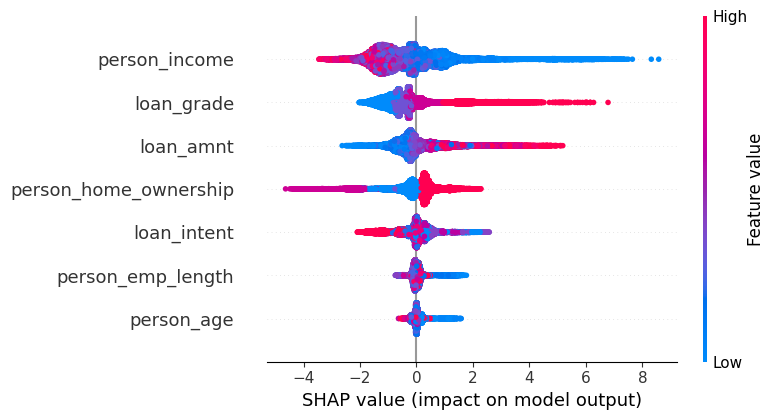

In [10]:
# SHAP Explainability
import shap

# Pick a sample application (first row)
sample_app = clean_data.iloc[0].to_dict()

# Generate SHAP explanation
explanation = risk_model.explain_prediction(sample_app)

# SHAP summary plot for the whole dataset
explainer = shap.TreeExplainer(risk_model.model)
shap_values = explainer.shap_values(X)

# Summary plot (feature importance across all samples)
shap.summary_plot(shap_values, X, feature_names=X.columns)

# Force plot for a single prediction (requires Jupyter, not just VSCode)
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X.iloc[0, :], feature_names=X.columns)

## Risk and ROI Visualizations
Visualize break-even analysis, risk tiers, and portfolio risk/return.

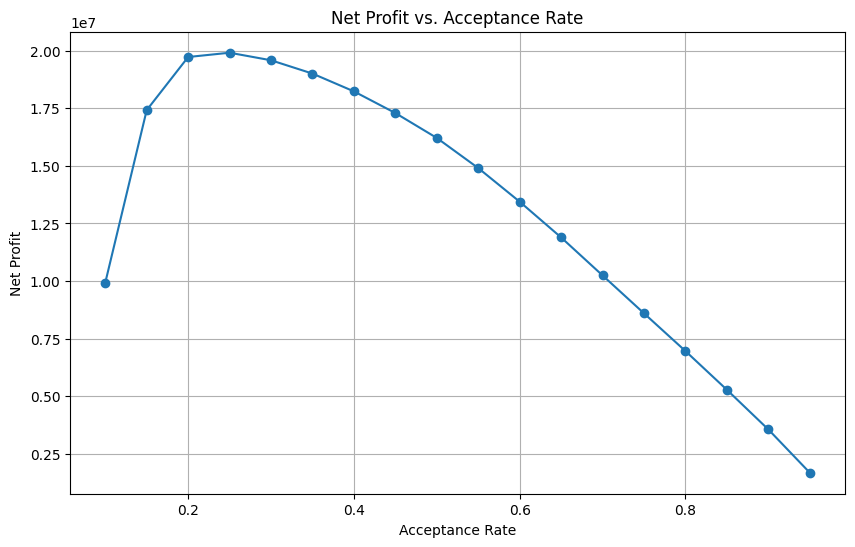

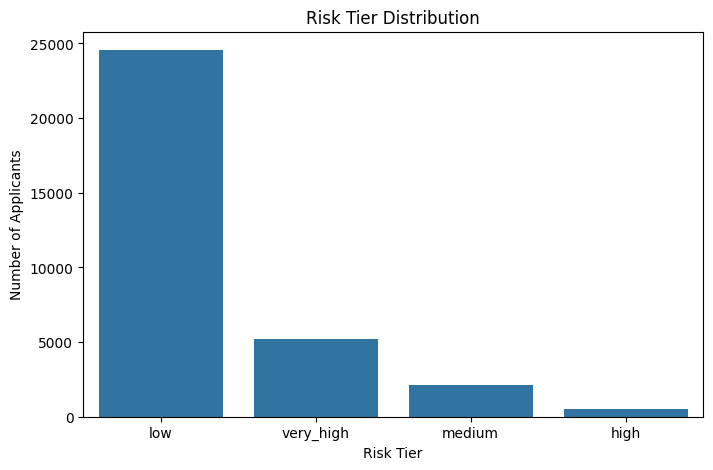

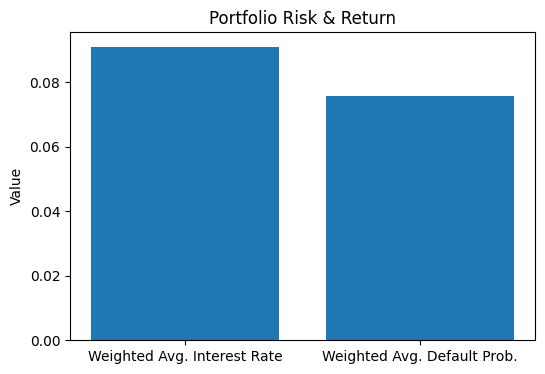

In [12]:
# Visualize break-even analysis
break_even_df = break_even['break_even_analysis']
plt.figure(figsize=(10,6))
plt.plot(break_even_df['acceptance_rate'], break_even_df['net_profit'], marker='o')
plt.title('Net Profit vs. Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Net Profit')
plt.grid(True)
plt.show()

# Visualize risk tier distribution
tiers = risk_report['tier_distribution']
plt.figure(figsize=(8,5))
sns.barplot(x=list(tiers.keys()), y=list(tiers.values()))
plt.title('Risk Tier Distribution')
plt.xlabel('Risk Tier')
plt.ylabel('Number of Applicants')
plt.show()

# Visualize weighted average interest rate and default probability
metrics = risk_report['portfolio_metrics']
plt.figure(figsize=(6,4))
plt.bar(['Weighted Avg. Interest Rate', 'Weighted Avg. Default Prob.'],
        [metrics['weighted_avg_interest_rate'], metrics['weighted_avg_default_probability']])
plt.title('Portfolio Risk & Return')
plt.ylabel('Value')
plt.show()

=== Interest Rate Prediction ===
Default Probability: 98.47%
Risk Tier: very_high
Interest Rate: 17.83%
Maximum Loan Amount: $16.01
Recommendation: Reject


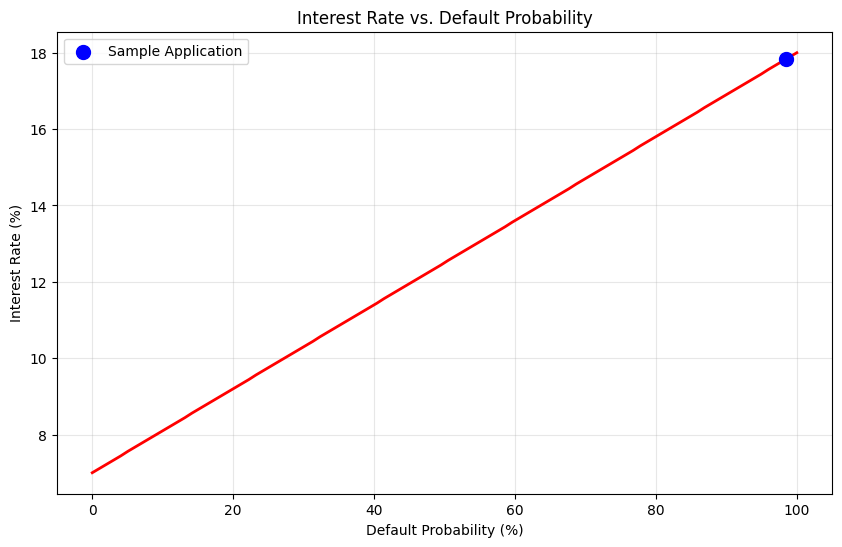


Portfolio Comparison:
Sample App Interest Rate: 17.83%
Portfolio Average: 9.09%
Difference: 8.74%


In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Interest Rate Prediction for New Applications
def predict_interest_rate(application_data, risk_model, risk_calc):
    """
    Predict interest rate for a new loan application.
    
    Args:
        application_data: Dictionary containing applicant features
        risk_model: Trained CreditRiskModel
        risk_calc: RiskCalculator instance
    
    Returns:
        Dictionary with prediction results
    """
    # Prepare features for the new application
    app_df = pd.DataFrame([application_data])
    X_app = risk_model.data_processor.prepare_features(app_df, fit=False)
    
    # Get risk prediction
    risk_prob = risk_model.model.predict_proba(X_app)[0, 1]
    
    # Calculate interest rate based on risk
    interest_rate = risk_model._calculate_interest_rate(risk_prob)
    
    # Determine risk tier
    risk_tier = risk_model._determine_risk_tier(risk_prob)
    
    # Calculate maximum loan amount (simplified)
    max_loan = application_data['person_income'] * 0.3 * (1 - risk_prob)
    
    return {
        'default_probability': risk_prob,
        'risk_tier': risk_tier,
        'interest_rate': interest_rate,
        'max_loan_amount': max_loan,
        'recommendation': 'Approve' if risk_prob < 0.6 else 'Reject'
    }

# Example: Predict interest rate for a sample application
sample_application = {
    'person_age': 35,                          # Must be integer
    'person_income': 3500,                     # Must be integer
    'person_home_ownership': 'MORTGAGE',       # Must be: 'RENT', 'OWN', 'MORTGAGE', 'OTHER'
    'person_emp_length': 3.0,                  # Must be a float number (years)
    'loan_intent': 'HOMEIMPROVEMENT',          # Must be: 'PERSONAL', 'EDUCATION', 'MEDICAL', 'VENTURE', 'HOMEIMPROVEMENT', 'DEBTCONSOLIDATION'
    'loan_grade': 'C',                         # Must be: 'A', 'B', 'C', 'D', 'E', 'F', 'G'
    'loan_amnt': 25000,                        # Must be integer
    'loan_percent_income': 25000 / 3500,      # Must be float (loan_amount / income)
    'cb_person_default_on_file': 'Y',          # Must be: 'Y' or 'N'
    'cb_person_cred_hist_length': 1            # Must be integer
}

# Make prediction
prediction_result = predict_interest_rate(sample_application, risk_model, risk_calc)

# Print results with correct formatting
print("=== Interest Rate Prediction ===")
print(f"Default Probability: {prediction_result['default_probability'] * 100:.2f}%")
print(f"Risk Tier: {prediction_result['risk_tier']}")
print(f"Interest Rate: {prediction_result['interest_rate'] * 100:.2f}%")
print(f"Maximum Loan Amount: ${prediction_result['max_loan_amount']:.2f}")
print(f"Recommendation: {prediction_result['recommendation']}")

# Visualize interest rate vs risk probability
risk_probs = np.linspace(0, 1, 100)
interest_rates = [risk_model._calculate_interest_rate(prob) for prob in risk_probs]

plt.figure(figsize=(10, 6))
plt.plot(risk_probs * 100, np.array(interest_rates) * 100, linewidth=2, color='red')
plt.scatter(prediction_result['default_probability'] * 100, prediction_result['interest_rate'] * 100, 
            color='blue', s=100, zorder=5, label='Sample Application')
plt.xlabel('Default Probability (%)')
plt.ylabel('Interest Rate (%)')
plt.title('Interest Rate vs. Default Probability')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# Compare with portfolio average (ensure metrics dictionary exists)
if 'metrics' in globals():
    print(f"\nPortfolio Comparison:")
    print(f"Sample App Interest Rate: {prediction_result['interest_rate'] * 100:.2f}%")
    print(f"Portfolio Average: {metrics['weighted_avg_interest_rate'] * 100:.2f}%")
    print(f"Difference: {(prediction_result['interest_rate'] - metrics['weighted_avg_interest_rate']) * 100:.2f}%")
